# Home work 1 - STA 221
**Zhikuan Quan (917800911)**

**Bohao Zou(917796070)**

## 0. Import Packages

In [66]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. True or False?
**(a) A rectangular matrix of size n $\times$ m is a linear transformation.**<br/>
True. It is by definition.<br/>
**(b) Only square matrices have Eigenvalue decompositions.** <br/>
True. Since the definition of an eigenvalue is only for square matrices.<br/>
**(c) Power Method can be used to find only eigenvectors (and not singular vectors)**<br/>
False. Power methods can also be used to compute singular value decomposition.<br/>
**(d) Singular vectors are orthogonal to each other.**<br/>
True. It is by definition.<br/>
**(e) Kernel PCA is a linear dimension reduction technique.** <br/>
False. It is non-linear with diverse kernel function.<br/>
**(f) Spectral Clustering is a non-linear dimension reduction technique.** <br/>
True. It is by definition.

## 2. Python practice via statistical concepts

In [8]:
# Generate the sample mean
dict = {}
random.seed(13)
N = 10000
n = [10, 100, 1000, 10000]
for iter in n:
    npoint = np.random.rand(N, iter)
    npoint[npoint < 0.5] = -1
    npoint[npoint >= 0.5] = 1
    dict[str(iter)+'_mean'] = np.mean(npoint, axis=1)


### (a) $log_{10} (n)$  vs $\bar{X}_n - \mu$

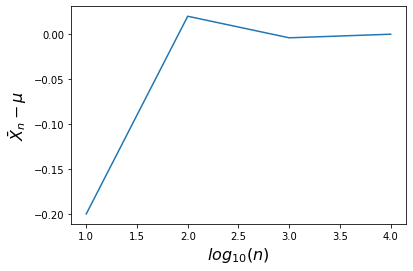

In [56]:
a_data_y = [dict[str(y) +'_mean'][0] for y in n]
a_data_x = [math.log10(x) for x in n]

sns.lineplot(x = a_data_x, y = a_data_y)
plt.xlabel(r'$log_{10} (n)$', fontsize=16)
plt.ylabel(r'$\bar{X}_n - \mu$', fontsize=16)
plt.show()

**It shows that the deviation $\bar{X}_n - \mu $ converges to 0 as n increases.**

### (b) $log_{10} (n)$  vs  $\frac{1}{N}\sum_{i=1}^N 1\{|\bar{X}_n^{(i)} - \mu|>\epsilon\}$

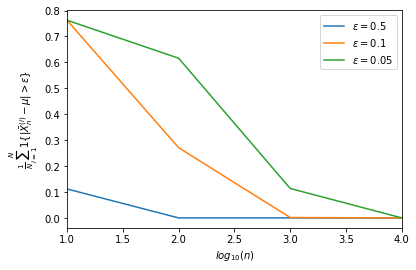

In [90]:
b_data_y_05= []
b_data_y_01= []
b_data_y_005= []
for i in range(N):
    np.array(b_data_y_05.append([abs(dict[str(y) +'_mean'][i]) > 0.5 for y in n]))
    np.array(b_data_y_01.append([abs(dict[str(y) +'_mean'][i]) > 0.1 for y in n]))
    np.array(b_data_y_005.append([abs(dict[str(y) +'_mean'][i]) > 0.05 for y in n]))
b_data = pd.DataFrame({'x':a_data_x,
                       r'$\epsilon = 0.5$':np.sum(b_data_y_05,axis =0)/N,
                       r'$\epsilon = 0.1$':np.sum(b_data_y_01,axis =0)/N,
                       r'$\epsilon = 0.05$':np.sum(b_data_y_005,axis =0)/N})
b_data.plot(x='x')
plt.xlabel(r'$log_{10} (n)$', fontsize=10)
plt.ylabel(r'$\frac{1}{N}\sum_{i=1}^N 1\{|\bar{X}_n^{(i)} - \mu|>\epsilon\}$', fontsize=10)
plt.show()

### (c) Histogram

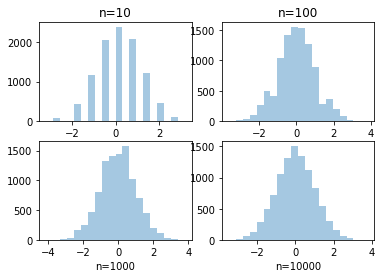

In [120]:
c_data = [dict[str(y) +'_mean']*math.sqrt(y) for y in n]
fig, ax = plt.subplots(2, 2, sharex=False, sharey=False)
sns.distplot(c_data[0],bins=20,kde=False,ax=ax[0,0]).set(title='n=10')
sns.distplot(c_data[1],bins=20,kde=False,ax=ax[0,1]).set_title('n=100')
sns.distplot(c_data[2],bins=20,kde=False,ax=ax[1,0]).set(xlabel='n=1000')
sns.distplot(c_data[3],bins=20,kde=False,ax=ax[1,1]).set(xlabel='n=10000')

plt.show()

**This plot illustrates the Central Limit Theorem: as n becomes bigger, the distribution tends to be normal.**